# Session 1

Let's get hands-on! During today's exercise, we will be starting from the basics: 
- Accessing the data files from the ATLAS Open Data website.
- The tools you will be using to access and visualise: $\texttt{python}$ in $\texttt{jupyter notebook}$, $\texttt{numpy}$ (this session) and finally ROOT (next session).
- Histograms and data analysis with $\texttt{numpy}$.
- Lorentz vectors and data analysis with $\texttt{numpy}$.

## ATLAS Open Data

[ATLAS Open Data](http://opendata.atlas.cern/) is an open dataset of both simulated and real proton-proton collision events. 
We will be using the [ATLAS 13 TeV Open Dataset](http://opendata.atlas.cern/release/2020/documentation/datasets/intro.html). 


## Analysis Tools


In today's session we will be using $\texttt{uproot}$ and $\texttt{numpy}$ to access events in ATLAS Open Data data files. Uproot is a python serialisation library that converts files from a ROOT format (a data format ubiqitiously used in High Energy Physics analysis) to regular arrays so we can manipulate it using regular but powerful python libraries. Specifically, we will be "uprooting" the data to arrays in $\texttt{numpy}$, a python library for multidimensional array and matrix manipulation.


We will be analysing the particles from a simulation of the following process:
(insert figure)
That is, the production of a W-boson and a Z-boson. 

Some important terminology:
- "leading" particle: The particle (lepton, quark) with the highest measured transverse momentum.
- "subleading" particle: The particle (lepton, quark) with the *second* highest measured transverse momentum.
(we similarly get "subsubleading", and "subsubsubleading"...)






In [ ]:
# Let's first import the necessary libraries and define our global variables
import uproot
import numpy as np

base_url = 'https://atlas-opendata.web.cern.ch/atlas-opendata/samples/2020/2lep/MC/'
input_file =  'mc_363358.WqqZll.2lep.root' # 'mc_410000.ttbar_lep.2lep.root'
tree_name = 'mini' # event "tree" in which information of each event in the data set are defined:
                   # event level information, particles and their properties

# function to retrieve the data from an input file.
def get_events(base_url,input_file,tree_name):
    events = uproot.open(f"{base_url}/{input_file}:{tree_name}")
    return events


In [ ]:
# Next we read in the content file and print the file content

events = get_events(base_url,input_file,tree_name)
print('opened dataset containing:\n', events.show())

In [ ]:
# now lets convert the variables we want to analyse into numpy arrays. THIS MAY TAKE A FEW SECONDS!
# The resulting 'lep_kinematics' variable is known as a structured numpy array.
lep_kinematics = events.arrays(['lep_n', 'lep_pt', 'lep_eta', 'lep_phi', 'lep_E'], library="np")                    

print("Number of leptons in first 5 events:\n", lep_kinematics['lep_n'][:5])
print('particle kinematics of leading lepton in first 5 events:')
for i in range(5):
    if lep_kinematics['lep_n'][i] >=1:
        print('lepton pT: %i MeV, eta: %f.2, phi: %f.2.'%(lep_kinematics['lep_pt'][i][0],lep_kinematics['lep_eta'][i][0], lep_kinematics['lep_phi'][i][0]))
    else:
        print("WARNING No leptons found in this event (number of leptons = %i)"%(lep_kinematics['lep_n'][i]))

### Histograms

Now that you know how to retrieve and access the data content, you are ready to analyse it.
Histograms are a good way to visualise a dataset and are fundamental to data analysis. They are a graphical representation of the distribution of a dataset; A way to visualize the frequency distribution of a set of continuous or discrete data.
In particle physics, histograms are often used to visualize the distribution of particle properties such as energy, momentum, or mass. A histogram is created by dividing a variable range into a set of "bins" and counting the number of times a particle or event property falls in that bin. Thus, the height of a histogram represents the frequency of events that fall into that bin.

Histograms can be very useful for understanding features in your data. Here, for example is the distribution of the size of all exo-planets in the Kepler space mission database, showing that smaller planets are more common than massive planets:
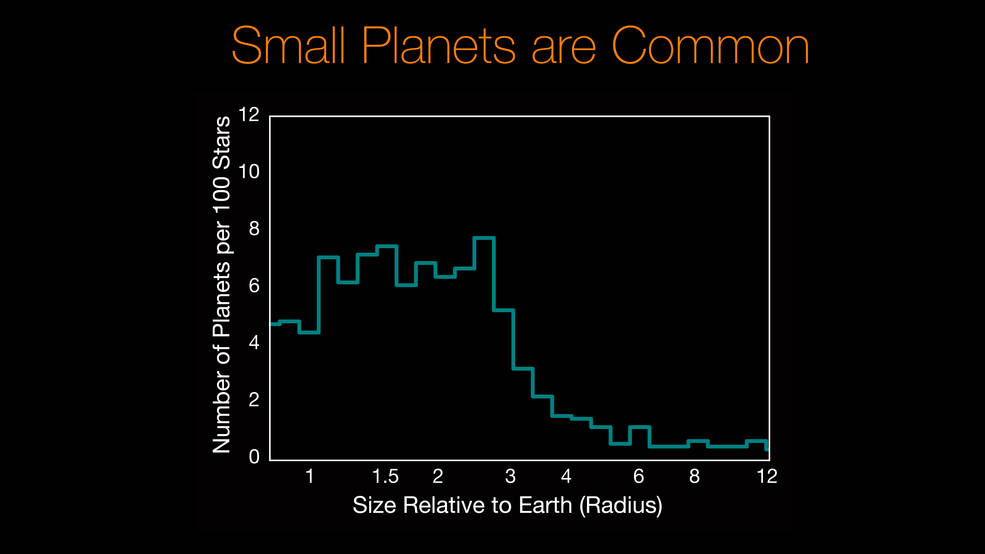

Interestingly, when they refined their measurements, they began to see multiple distributions:
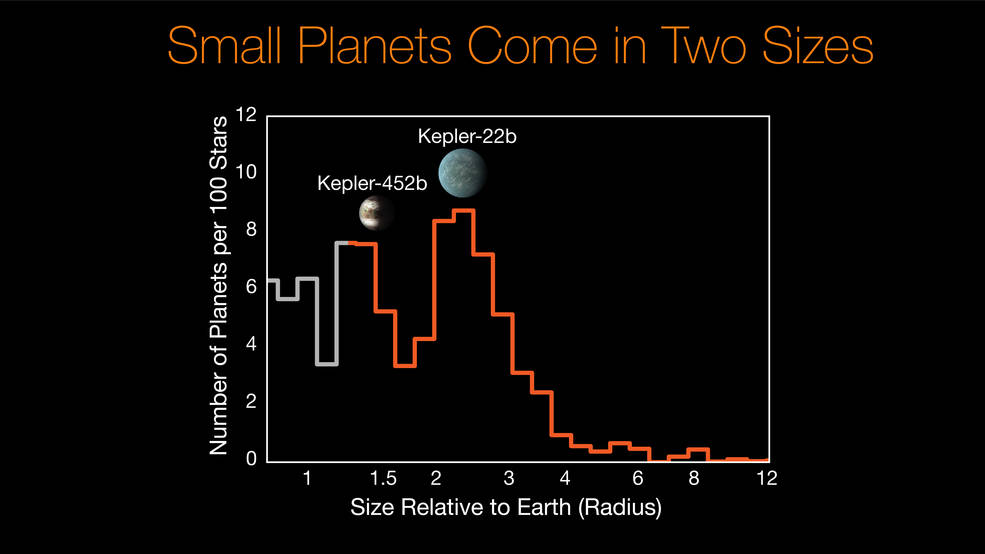

(ref: [NASA Kepler website](https://www.nasa.gov/ames/kepler/briefing-materials-final-kepler-survey-catalog-of-planet-candidates-in-the-cygnus-field))

A histogram can also be normalised which changes the definition of its content. For example, in the Kepler histograms above each bin measures the number of planets per 100 stars, which is in effect a rate measurement: There are roughly 6 Earth-sized planets for every 100 stars.
If one were to sum the counts (all bin heights) and divide all bin counts by the total sum, one would get a density distribution: The fraction of planets of a certain radius.

### Making a histogram

Let's make a histogram of some particle variables. A histogram is defined by two arrays: the bin edges and the number of entries in each bin. 



> **Side note: Underflows and overflows** When defining a histogram you need to choose the total range over which the data will be represented as you will be choosing the first bin edge and the last bin edge. Any data that falls outside of this range can be filled in the so-called "underflow" and "overflow" bins. As the under- and overflow bins theoretically don't have a lower and and upper edge, respectively, they will not accurately represent the continued data distribution. Thus they are not commonly plotted as part of the histogram, however it is sometimes useful to know the fraction of data your histogram is representing relative to the fraction outside its range.

#### Variables for histogramming

Below you will retrieve a variable from your input file and make histogram distributions - we'll start by retrieving the number of jets per event ("jet_n").

After that you can try plotting other variables. Refer to the print out in the second cell of the notebook or see the [ATLAS Open Data Website here](http://opendata.atlas.cern/release/2020/documentation/datasets/dataset13.html) for a list of variables in the dataset. Ask us if you don't understand what a variable means! We will also gradually be learning about most of these variables during this course. 

In [ ]:
# first, retrieve the data you want. 

list_of_variables = ['jet_n']  # <-- ADD YOUR VARIABLES HERE
particle_arrays = events.arrays(list_of_variables, library="np") 

# You may want to print out your variables of interest for a subset of events to get an idea of their magnitude:
# ( Or better yet print the maximum and minimum value in the array! )
for key in particle_arrays:
    print(key, " for first 3 events:\n", particle_arrays[key][:5])

In [ ]:
# next, define your histogram in numpy
# Remember, a histogram consists of 2 arrays: The bin edges, and the bin counts.
# The bin edges are defined by the minimum and maximum value of the variable range, and the bin width 
# (the value range that each bin represents).
# While histograms do *not* have to have bins of equal width, lets choose one bin size.

# ADJUST these parameters to make it suitable to the variable you are looking at.
bin_width = 1 
hist_min = 0
hist_max = 20
bins = int((hist_max-hist_min)/bin_width)

bin_edges = np.array(np.arange(0, hist_max+bin_width, bin_width))
print('histogram bin edges: ', bin_edges)
print('total number of histogram bin edges: ', len(bin_edges), "to define ", bins, "bins.")

In [ ]:
# Now make and fill the bins!
# We can ignore underflow and overflow bins for this - but I challenge you to add them and
# check the under and overflow of your histogram!

var_key = 'jet_n' # fill me with chosen variable to histogram

bin_entries = np.array(np.zeros(len(bin_edges)-1)) # bin entry has size number of bin edges - 1, as bin edges define boundaries 

for ii,var in enumerate(particle_arrays[var_key]):
    print("Processing ", var, " for event ", ii) # REMOVE this and fill histogram array
    if ii > 3: break                             # REMOVE this and fill histogram array
print("histogram bin entries: ", bin_entries)
print("histogram total bins (including under- and overflow): ", len(bin_entries))

In [ ]:
# Now we draw it using matplotlib's bar option.

import matplotlib.pyplot as plt

# bin_edges[:-1]: ignore last bin edge.
plt.bar(bin_edges[:-1], bin_entries, width=bin_width, label = 'my variable name', color='blue')
legend = plt.legend(loc="upper right")

# set appropriate x and y axes labels : think about it!
xlabel = 'x label'
ylabel = 'y label'

plt.xlabel(xlabel)
plt.ylabel(ylabel)

plt.show()

### Using numpy's histogram

To make things easier, $\texttt{numpy}$ has a built in histogram function. Let's see how your hand-made histogram compares to the $\texttt{numpy}$ verion.

In [ ]:
# defining same histogram using full numpy functionality.
    
np_bin_entries, np_bin_edges = np.histogram(particle_arrays[var_key], bins=bins, range=[hist_min,hist_max])

print('numpy bin edges: ', np_bin_edges)
print('numpy number of bin edges: ', len(np_bin_edges))
print('numpy number of bin entries: ', len(np_bin_entries))

# np_bin_edges[:-1] to ignore last bin edge.
plt.bar(bin_edges[:-1], bin_entries, width=bin_width, label = f'{var_key}: my hist', color='blue')
plt.bar(np_bin_edges[:-1], np_bin_entries, width=bin_width, label = f'{var_key}: numpy', color='blue') 
legend = plt.legend(loc="upper right")

## Exploring data on an event display

Next we will be making event displays of collision events - another way of exploring your data! Event displays is the reconstructed image of a single event. To make an event display we want to "reconstruct" the particles first. 

### Particle four-momenta
We describe particles by their type and their four-momentum, which is a four-component vector consisting of their energy and momentum in the three spatial dimensions. This four-momentum vector is known as a Lorentz vector.
The components of a Lorentz vector depend on the frame of reference from which they are measured (in our case it is the lab reference frame), and they transform in a specific way under Lorentz transformations, which are the mathematical transformations that relate the measurements made in different frames of reference.

In [ ]:
# Here we create some classes and functions to reconstruct our particles.
# the four momentum class reads in the particle properties contained in the data samples and
# transforms these 

import math

class four_momentum:
    def __init__(self, pt, eta, phi, E):
        self.pt=pt
        self.eta=eta
        self.phi=phi
        self.E=E
        self.px = self.pt*math.cos(self.phi)
        self.py = self.pt*math.sin(self.phi)
        self.pz = self.pt*math.sinh(self.eta)
    def get_ptetaphi(self,px,py,pz):
        pt =  math.sqrt(px**2+py**2) 
        eta = math.asinh(pz/pt)
        phi = math.acos(px/pt)
        return pt,eta,phi
    def mass(self):
        print("fill me")
        return math.sqrt(self.E**2 - self.px**2 - self.py**2 - self.pz**2)
    def __add__(self, fourvec2):  # overriding the "+" operator
        #print("fill me: add another 4-momentum vector to me ")
        E_new = self.E+ fourvec2.E
        px_new = self.px + fourvec2.px
        py_new = self.py + fourvec2.py
        pz_new = self.pz + fourvec2.pz
        pt_new,eta_new,phi_new = self.get_ptetaphi(px_new,py_new,pz_new)
        return four_momentum(pt_new,eta_new,phi_new,E_new) 

        
def print4vec(fourvec):
    print("E  : %.2f MeV"%(fourvec.E))
    print("pt : %.2f MeV"%(fourvec.pt))
    print("eta: %.2f    phi: %.2f"%(fourvec.eta,fourvec.phi))
    print(" px: %.2f MeV py: %.2f MeV\n"%(fourvec.px,fourvec.py))
    
def get_four_momentum(ptype, pIdx, evt, data):
    'Function to construct the 4-momentum of a particle'
    if not ptype in ["lep", "jet", "photon", "largeRjet", "tau"]:
        raise ValueError("particle type ", ptype, "not recognised")
    prefix = f"{ptype}_"
    E   = data[prefix+"E"][evt][pIdx]
    pt  = data[prefix+"pt"][evt][pIdx]
    eta = data[prefix+"eta"][evt][pIdx]
    phi = data[prefix+"phi"][evt][pIdx]
    return four_momentum(pt,eta,phi,E)

map_lep_type = {11: "electron", 13:"muon"}  

In [ ]:
## this time we will be using the Z->ll, W->qq sample:
input_file =  'mc_363358.WqqZll.2lep.root' # 'mc_410000.ttbar_lep.2lep.root'

# function to retrieve the data from an input file.
events = get_events(base_url,input_file,tree_name)
events.show()

In [ ]:
import matplotlib.pyplot as plt

## Lets reconstruct particles and make an event display. 
# Lets start by retrieving all variables needed to reconstruct the LEADING and SUBLEADING lepton

list_of_variables = ['lep_E', 'lep_pt', 'lep_eta', 'lep_phi', 'lep_type', 'jet_pt', 'jet_eta', 'jet_phi', 'jet_E']  # <-- ADD YOUR VARIABLES HERE
lep_variables = events.arrays(list_of_variables, library="np") 

In [ ]:
## Here we finally build our particles and make the event displays

# some cosmetic settings
colours = {"muon": "blue", "electron": "orange", "jet":"red"}


# Which event do we want to look at?
event_no = 8

# Retrieve our particles
leading_lep_type = lep_variables["lep_type"][event_no][0]
leading_lep = get_four_momentum("lep", 0, event_no, lep_variables) # 0 for leading lepton
subleading_lep_type = lep_variables["lep_type"][event_no][1] 
subleading_lep = get_four_momentum("lep", 1, event_no, lep_variables) # 1 for subleading lepton

leading_jet = get_four_momentum("jet", 0, event_no, lep_variables)
subleading_jet = get_four_momentum("jet", 1, event_no, lep_variables)


print("leading lepton properties: ")
print("type: ", map_lep_type[leading_lep_type] )
print4vec(leading_lep)
print("subleading lepton properties: ")
print("type: ", map_lep_type[subleading_lep_type] )
print4vec(subleading_lep)

print("leading jet properties: ")
print4vec(leading_jet)
print("subleading jet properties: ")
print4vec(subleading_jet)


leading_lep_colour = colours[map_lep_type[leading_lep_type]]
subleading_lep_colour = colours[map_lep_type[subleading_lep_type]]
jet_colour = colours['jet']

width_scale = 1e-7
arrow_scale = 4

dilep = leading_lep + subleading_lep
print("di-lepton mass : %.2f GeV"%(dilep.mass()*1e-3))
print("di-lepton properties: ")
print4vec(dilep)

dijet = leading_jet + subleading_jet
print("di-jet mass : %.2f GeV"%(dijet.mass()*1e-3))
print("di-jet properties: ")
print4vec(dijet)

plt.quiver([0,0],[0,0], [0,leading_lep.px],[0,leading_lep.py], width=width_scale*leading_lep.E, scale=arrow_scale*leading_lep.pt, color=leading_lep_colour)
plt.quiver([0,0],[0,0], [0,subleading_lep.py],[0,subleading_lep.py], width=width_scale*subleading_lep.E, scale=arrow_scale*subleading_lep.pt, color=subleading_lep_colour)
plt.quiver([0,0],[0,0], [0,dilep.px],[0,dilep.py], width=width_scale*dilep.E, scale=arrow_scale*dilep.pt, color="purple")
plt.quiver([0,0],[0,0], [0,leading_jet.px],[0,leading_jet.py], width=width_scale*leading_jet.E, scale=arrow_scale*leading_jet.pt, color=jet_colour)
plt.quiver([0,0],[0,0], [0,subleading_jet.px],[0,subleading_jet.py], width=width_scale*subleading_jet.E, scale=arrow_scale*subleading_jet.pt, color=jet_colour)
plt.quiver([0,0],[0,0], [0,dijet.px],[0,dijet.py], width=width_scale*dijet.E, scale=arrow_scale*dijet.pt, color="black")


plt.xlabel("x")
plt.ylabel("y")

plt.show()

### Explore the event display

Explore the event display by adding more information. For example, there is also a W-boson decay in each event: Can you reconstruct its decay products and visualise them?

> Side note: Sometimes the data does not contain all the reconstructed objects you expect to find as they might have shot out outside the detector acceptance region, and sometimes you find different reconstructed objects from background processes. Remember, these datasets have on the order of $\mathcal{O}(10s)$ of proton-proton interactions in the same event - these are almost always uninteresting low energy quantumchromodynamic processes resulting in additional jets.

### Homework: Reconstruct the di-lepton mass and analyse it

Use the above `class four_momentum` to add two four-momenta together to reconstruct a parent particle. Then write a function for the class that computes the invarient mass of a particle defined as a 4-vector.

Consider the $Z\rightarrow\ell\ell$,$W\rightarrow q\bar{q}$ sample: What two types of particle objects would you add together and reconstruct the combined mass for? At what mass do you expect them to resonate?

For this exercise, you can both experiment with adding the combined 4-vector to the event display and making a histogram of the mass of the combined 4-vector. 

### Bonus questions
- If we were to transform our system into the parent particle's rest frame (parent particle has 0 momentum in its rest frame):
  - How would the parent particle's and the decay product momentum vectors change?
  - How would the reconstructed invariant mass of the di-lepton or di-jet system change?
- How do the physical quantities we've discussed today change in a $e^+$-$e^-$ collider?
